In [1]:
import numpy as np
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf

import matplotlib.pyplot as plt
from matplotlib import rcParams
from cycler import cycler

rcParams['figure.figsize'] = 18, 5
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['axes.prop_cycle'] = cycler(color=['#365977'])
rcParams['lines.linewidth'] = 2.5

In [2]:
df = pd.read_csv("AirQualityUCI.csv")
df.head()
df = df.drop(['Unnamed: 15', 'Unnamed: 16'], axis=1)
null_data = df[df.isnull().any(axis=1)]
df = df.dropna()
df = df.replace(-200, np.nan)
df['Date'] = pd.to_datetime(df['Date'],dayfirst=True)
h = df['Time'].tolist()
l=[]
for i in range(len(h)):
    l.append(h[i].split(":")[0])
df['hour']=l
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
cols=["year","month","day","hour"]
df['date'] = df[cols].apply(lambda x: '/'.join(x.values.astype(str)), axis="columns")
df['date']=pd.to_datetime(df['date'])
del df['Date']
del df['Time']
df.set_index('date', inplace=True)
del df['NMHC(GT)']

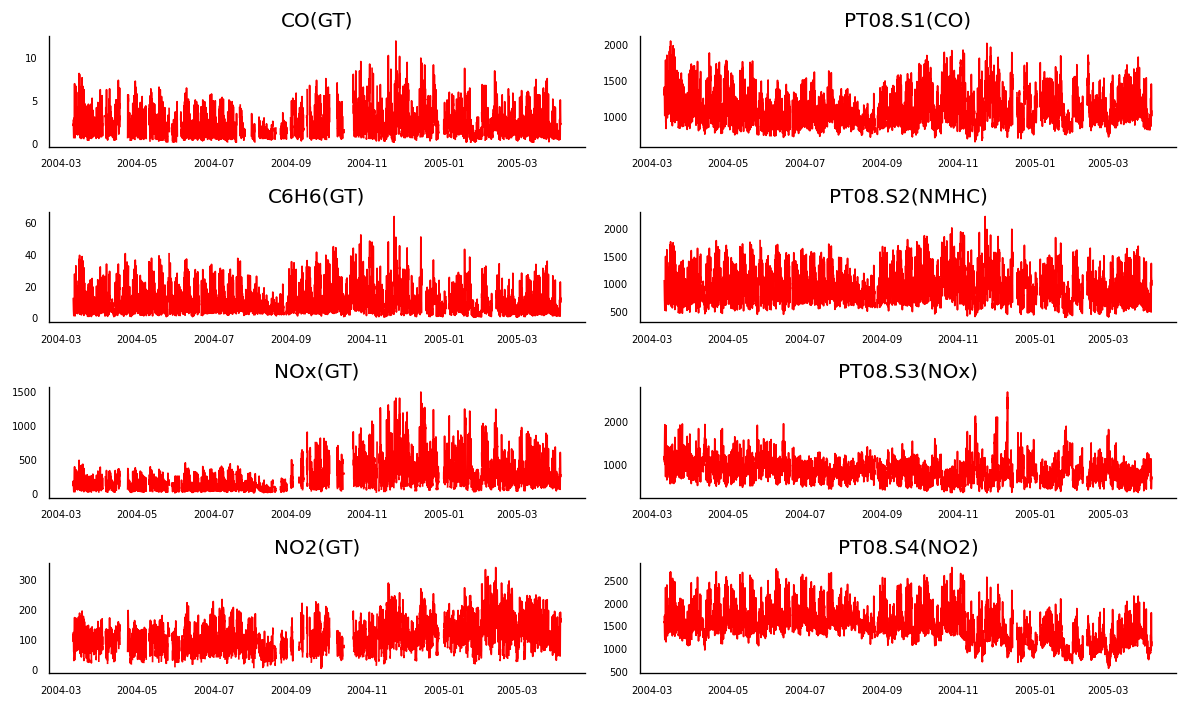

In [3]:
fig, axes = plt.subplots(nrows=4, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = df[df.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [4]:
df['CO(GT)'] = df['CO(GT)'].ewm(halflife=4).mean()
df['PT08.S1(CO)'] = df['PT08.S1(CO)'].ewm(halflife=4).mean()
df['C6H6(GT)'] = df['C6H6(GT)'].ewm(halflife=4).mean()
df['PT08.S2(NMHC)'] = df['PT08.S2(NMHC)'].ewm(halflife=4).mean()
df['NOx(GT)'] = df['NOx(GT)'].ewm(halflife=4).mean()
df['PT08.S3(NOx)'] = df['PT08.S3(NOx)'].ewm(halflife=4).mean()
df['NO2(GT)'] = df['NO2(GT)'].ewm(halflife=4).mean()
df['PT08.S4(NO2)'] = df['PT08.S4(NO2)'].ewm(halflife=4).mean()
df['PT08.S5(O3)'] = df['PT08.S5(O3)'].ewm(halflife=4).mean()
df['T'] = df['T'].ewm(halflife=4).mean()
df['RH'] = df['RH'].ewm(halflife=4).mean()
df['AH'] = df['AH'].ewm(halflife=4).mean()

In [5]:
COGT, C6H6GT, NOxGT, NO2GT = np.array(df['CO(GT)']), np.array(df['C6H6(GT)']), np.array(df['NOx(GT)']), np.array(df['NO2(GT)'])

In [6]:
COGT.shape

(9357,)

In [15]:
def plot(white_noise,n):
    
# Split into an arbitraty number of chunks
    white_noise_chunks = np.split(white_noise, n)
    means, stds = [], []

# Get the mean and std values for every chunk
    for chunk in white_noise_chunks:
        means.append(np.mean(chunk))
        stds.append(np.std(chunk))
    
    
    # Plot
    plt.title('White Noise Mean and Standard Deviation Comparison', size=20)
    plt.plot(np.arange(len(means)), [white_noise.mean()] * len(means), label='Global mean', lw=1.5)
    plt.scatter(x=np.arange(len(means)), y=means, label='Mean', s=100)
    plt.plot(np.arange(len(stds)), [white_noise.std()] * len(stds), label='Global std', lw=1.5, color='orange')
    plt.scatter(x=np.arange(len(stds)), y=stds, label='STD', color='orange', s=100)
    plt.legend();

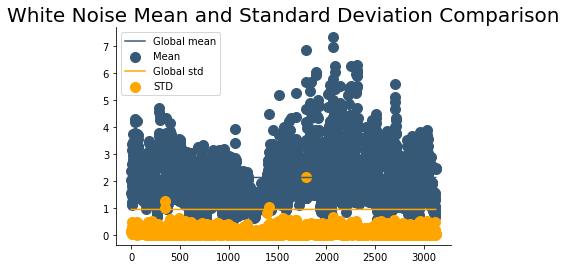

In [16]:
plot(COGT,3119)

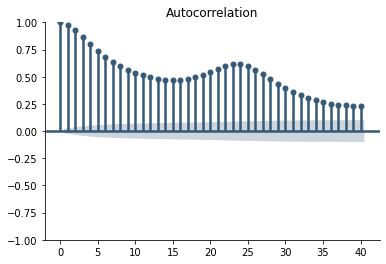

In [17]:
plot_acf(np.array(COGT));

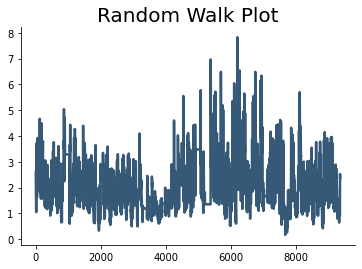

In [18]:
# Plot
plt.title('Random Walk Plot', size=20)
plt.plot(np.arange(len(COGT)), COGT);